## 시간대에 따른 따릉이 수요 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df = pd.read_csv('df_sbikedata.csv')

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#전체 데이터의 모든 변수 확인

df.isnull().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

In [4]:
df.shape

(5827, 11)

In [5]:
df.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.609325,13.737597,0.018075,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.020000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [6]:
df['hour']

0        1
1        2
2        3
3        4
4        5
        ..
5822    20
5823    21
5824    22
5825    23
5826     0
Name: hour, Length: 5827, dtype: int64

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 사용 가능한 한글 폰트 목록 확인
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 설정한 폰트 경로에 따라 경로 변경
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 예시로 나눔 고딕을 사용합니다.

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 데이터프레임을 시간(hour) 열을 기준으로 0~6시, 6~12시, 12~18시, 18~24시로 나누기
bins = [0, 6, 12, 18, 24]
labels = ['0-6시', '6-12시', '12-18시', '18-24시']
df['time_group'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)

# 각 시간대 그룹별로 따릉이 대여량의 평균 구하기
result_df = df.groupby('time_group')['count'].mean()

df

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,time_group
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,0-6시
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,0-6시
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,0-6시
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,0-6시
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,0-6시
...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,18-24시
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,18-24시
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,18-24시
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,18-24시


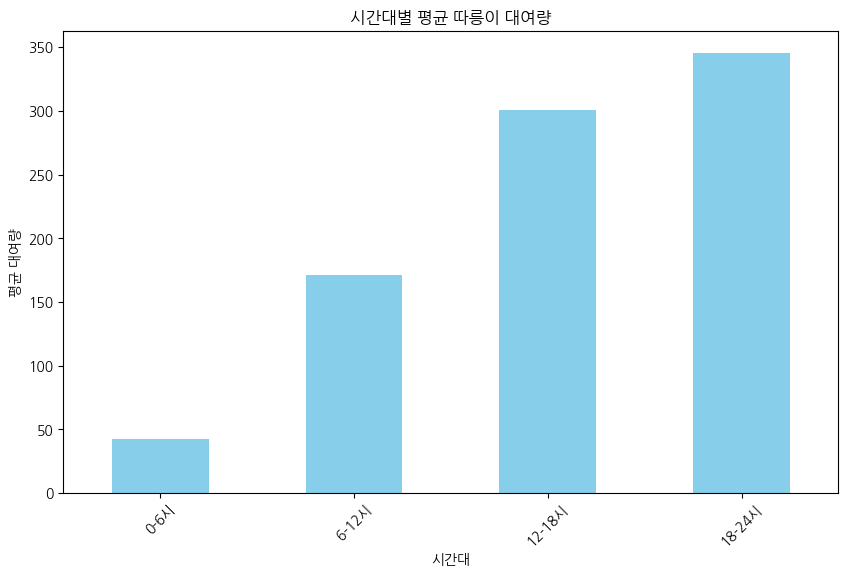

In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 사용 가능한 한글 폰트 목록 확인
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 설정한 폰트 경로에 따라 경로 변경
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 예시로 나눔 고딕을 사용합니다.

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 그래프 그리기
plt.figure(figsize=(10, 6))
result_df.plot(kind='bar', color='skyblue')
plt.xlabel('시간대')
plt.ylabel('평균 대여량')
plt.title('시간대별 평균 따릉이 대여량')
plt.xticks(rotation=45)
plt.show()